In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Regression line vs other lines

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

## 2016 election dataset

In [3]:
demographics = Table.read_table('district_demographics2016.csv')
demographics

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3
Alabama,"Congressional District 6 (115th Congress), Alabama",61413,26.1,36.7
Alabama,"Congressional District 7 (115th Congress), Alabama",34664,69.8,19.4
Alaska,"Congressional District (at Large) (115th Congress), Alaska",76440,37.6,29.6
Arizona,"Congressional District 1 (115th Congress), Arizona",50537,46.6,24.5
Arizona,"Congressional District 2 (115th Congress), Arizona",49072,49.6,34


In [4]:
predict_voting = demographics.select('Median Income', 'Percent voting for Clinton')
predict_voting = predict_voting.with_columns('Fitted',
    fitted_values(demographics, 'Median Income', 'Percent voting for Clinton'))

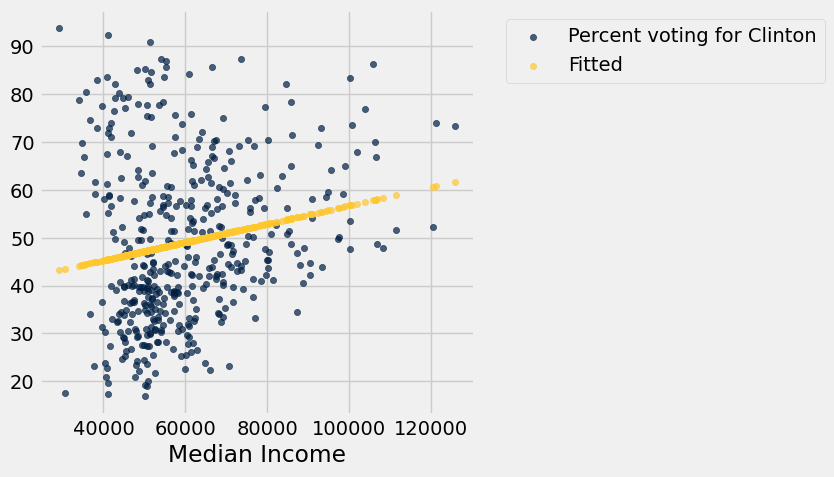

In [5]:
predict_voting.scatter('Median Income')

In [ ]:
predict_income = demographics.select('College%', 'Median Income')
predict_income = predict_income.with_columns('Fitted',
    fitted_values(demographics, 'College%', 'Median Income'))
predict_income.scatter('College%')

## Residuals

In [ ]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

In [ ]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [ ]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

In [ ]:
demographics.scatter('College%')

In [ ]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

In [ ]:
plot_residuals(demographics, 'College%', 'Median Income')

In [ ]:
family_heights = Table.read_table('family_heights.csv')
parents = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parents,
    'Child', family_heights.column('child')
    )
plot_residuals(heights, 'Parent Average', 'Child')

## Dugongs ##

In [ ]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

In [ ]:
dugong.scatter('Length', 'Age')

In [ ]:
correlation(dugong, 'Length', 'Age')

In [ ]:
plot_residuals(dugong, 'Length', 'Age')

# US Women

In [ ]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

In [ ]:
us_women.scatter('height')

In [ ]:
correlation(us_women, 'height', 'ave weight')

In [ ]:
plot_residuals(us_women, 'height', 'ave weight')

## Average of Residuals ##

In [ ]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

In [ ]:
round(np.average(residuals(heights, 'Parent Average', 'Child')), 6)

In [ ]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

In [ ]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'Parent Average', 'Child'),
    'Fitted Value', fitted_values(heights, 'Parent Average', 'Child')
)


In [ ]:
round(correlation(heights, 'Parent Average', 'Residual'), 6)

In [ ]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)